[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/3.1%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EA%B0%9C%EB%B3%84%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%A7%91%ED%95%98%EA%B8%B0-input.ipynb)

## 라이브러리 불러오기

In [1]:
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [3]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

## 개별 종목의 일별 시세 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [4]:
# 삼성전자 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'

df = fdr.DataReader('005930', "2017", "2024")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


<AxesSubplot:xlabel='Date'>

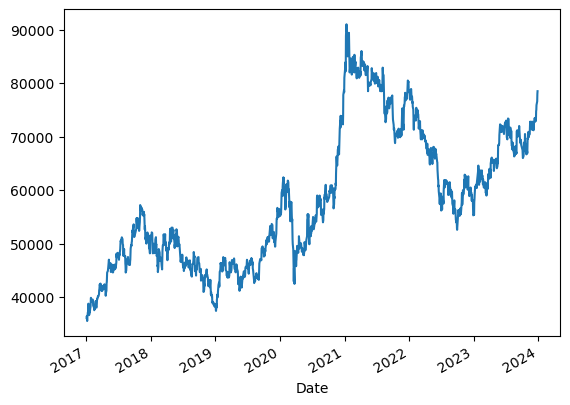

In [5]:
# 종가 시각화 하기
df["Close"].plot()

## 상장종목 목록 가져오기

In [8]:
# 다시 KRX 데이터를 받아오세요.
df_krx = fdr.StockListing('KRX')

In [10]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,77600,2,-400,-0.51,79000,79000,77500,13151889,1028553770200,463255125880000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,173200,2,-400,-0.23,177000,177500,173200,2336256,408840628653,126090009618000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,391000,1,2000,0.51,391000,394000,387000,121565,47535663000,91494000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,771000,2,-4000,-0.52,779000,781000,771000,56064,43419273679,54875154000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,64600,2,-400,-0.62,65700,65700,64600,489281,31830684600,53158480820000,822886700,STK


## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [12]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx[["Code", "Name"]].head()

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005935,삼성전자우


In [14]:
# df_krx의 Name column 에서 '하이브'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['하이브'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 하이브 (series) -> ['하이브'] (list) -> '하이브' (string)
item_name = "하이브"
df_krx.loc[df_krx["Name"] == item_name, "Code"].tolist()[0]

'352820'

In [23]:
# '히트'라는 이름을 가진 상장사가 있는지 확인해 보기
df_krx.loc[df_krx["Name"] == "히트", "Code"].tolist()

[]

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [24]:
# 종목명으로 종목코드 받아오는 함수 만들기


# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.
# def item_code_by_item_name(item_name):
"""
종목명을 받아 종목코드를 찾아 반환하는 함수
"""


def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Code"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [27]:
item_code_by_item_name("하이브")

'352820'

In [29]:
# 네이버로 등록된 상장사는 없음. 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인
item_code_by_item_name("네이버")

False

In [31]:
# 네이버는 NAVER로 등록되어 있음
item_code_by_item_name("NAVER")

'035420'

In [32]:
# 삼성전자
item_code_by_item_name("삼성전자")

'005930'

In [33]:
# 셀트리온과 카카오게임즈도 확인
item_code_by_item_name("셀트리온")

'068270'

In [35]:
item_code_by_item_name("카카오게임즈")

'293490'

## 종목명으로 일별시세를 받아오는 함수 만들기

In [36]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택
# def find_item_list(item_name, year=2020):

def find_item_list(item_name, year=2020):
    
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [38]:
find_item_list("NAVER", 2024)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,222500,229000,221000,227500,716469,0.015625
2024-01-03,223500,224000,220000,222000,690960,-0.024176
2024-01-04,221000,225500,220500,223000,538911,0.004505
2024-01-05,222500,224000,219500,220500,387884,-0.011211
2024-01-08,222000,231500,222000,226500,1054917,0.027211
...,...,...,...,...,...,...
2024-04-26,184100,184500,181500,181500,438747,-0.006568
2024-04-29,182200,184800,181600,184700,510519,0.017631
2024-04-30,184600,187500,183800,184400,620050,-0.001624


### 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [39]:
# LG화학의 데이터를 가져오기
find_item_list("LG화학")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,321000,321000,313500,314000,139496,-0.011024
2020-01-03,317000,318500,310500,311000,165030,-0.009554
2020-01-06,308000,311000,306500,307000,138154,-0.012862
2020-01-07,306000,313500,305000,311000,133788,0.013029
2020-01-08,306000,307000,301500,302000,225471,-0.028939
...,...,...,...,...,...,...
2024-04-26,373500,376000,368500,373500,224588,0.001340
2024-04-29,377500,400500,377000,395500,607744,0.058902
2024-04-30,397500,412000,390500,402500,525542,0.017699


In [41]:
# 하이브의 데이터를 가져와서 stock_daily 변수에 선언
stock_daily = find_item_list("하이브")
stock_daily


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2024-04-26,206000,207500,199800,201500,1122644,-0.049528
2024-04-29,201500,206500,201000,205000,502131,0.017370
2024-04-30,203500,205000,202000,202000,280426,-0.014634


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

<AxesSubplot:xlabel='Date'>

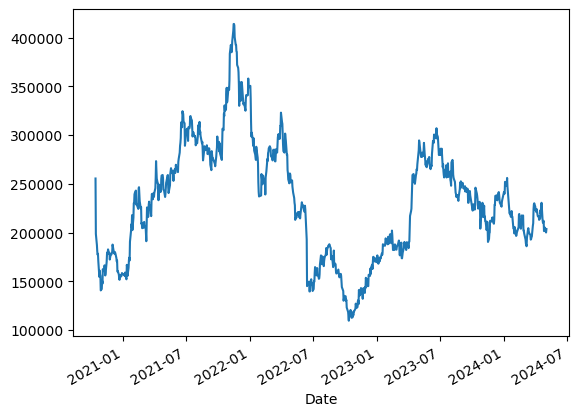

In [43]:
# stock_daily 변수에 할당된 수집된 데이터 증감 그래프 그리기
stock_daily["Close"].plot()

<AxesSubplot:xlabel='Date'>

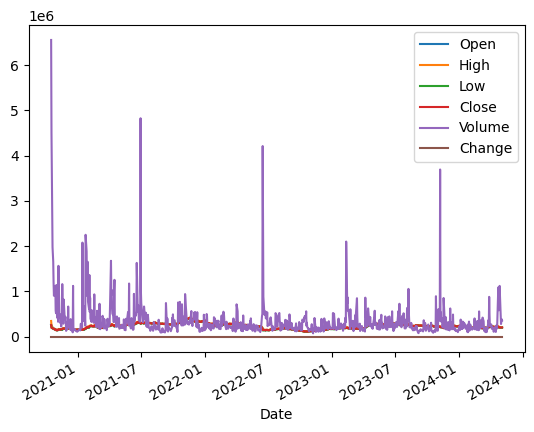

In [45]:
# 전체 데이터프레임을 plot() 으로 시각화
stock_daily.plot()

### 서브플롯 그리기

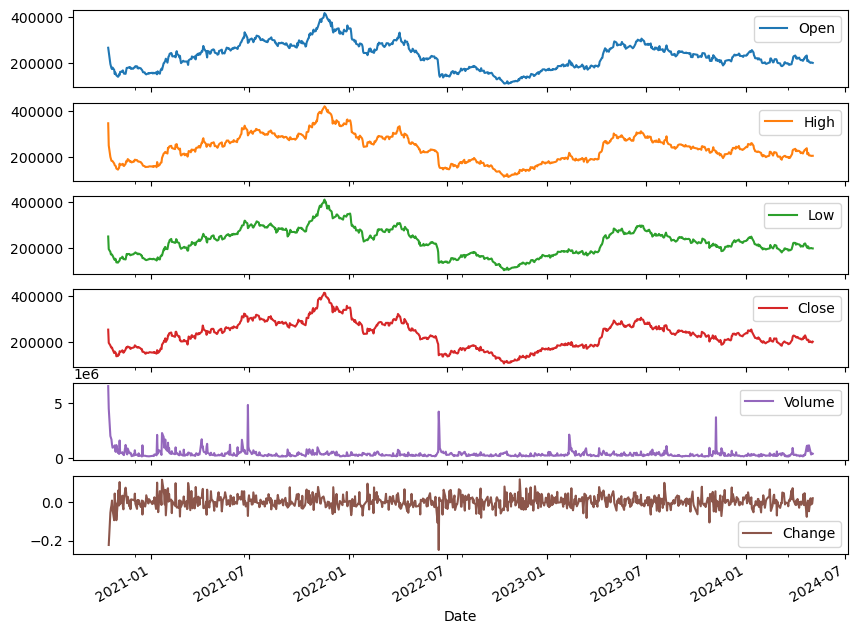

In [46]:
# 수집한 종목의 선그래프를 Pandas 로 그리기. 스케일이 다르므로 subplots를 사용
g = stock_daily.plot(subplots=True, figsize=(10, 8))

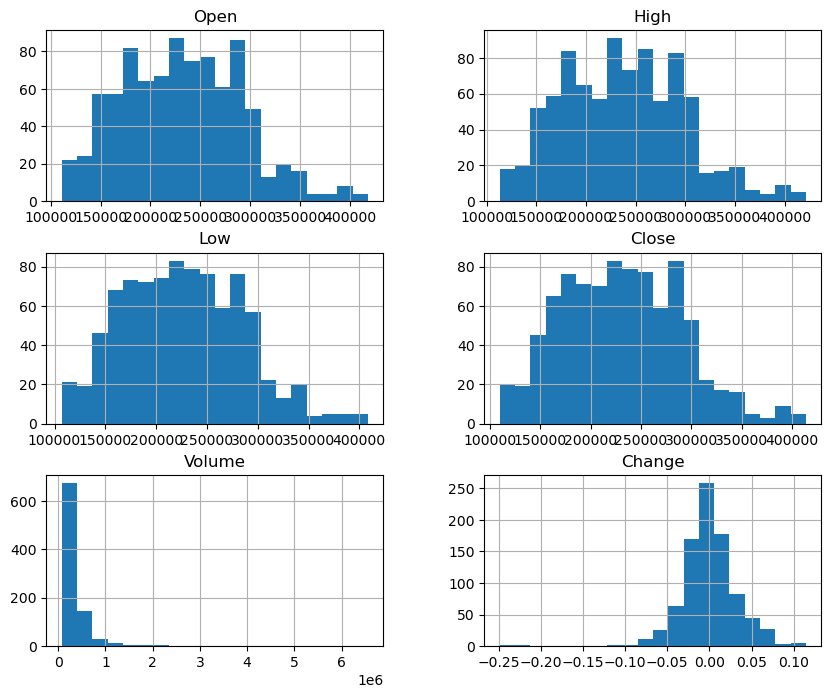

In [47]:
# 히스토그램 그리기
h = stock_daily.hist(figsize=(10, 8), bins=20)

### 2축 그래프 그리기

<AxesSubplot:xlabel='Date'>

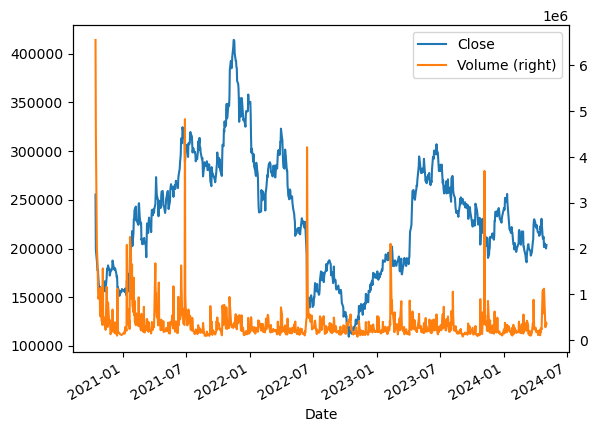

In [48]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

### 과학적 기수법
* 참고 : E notation
[과학적 기수법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B3%BC%ED%95%99%EC%A0%81_%EA%B8%B0%EC%88%98%EB%B2%95)

과학적 기수법, 과학적 표기법(scientific notation, scientific form, standard index form, standard form)은 너무 크거나 너무 작은 숫자들을 십진법으로 편하게 작성하여 표현하는 방법이다. 과학자, 수학자, 공학자들이 공통적으로 사용하는데, 부분적인 이유는 특정한 산술을 단순화시켜 주기 때문이다. 과학 계산기에서는 "SCI" 디스플레이 모드라는 이름으로 알려져 있다.

In [49]:
format(1e6, ",")

'1,000,000.0'

In [50]:
format(10**6,",")

'1,000,000'

In [51]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,877.000000,877.000000,877.000000,877.000000,8.770000e+02,876.000000
mean,231460.759407,236751.653364,226442.039909,231154.834664,3.489071e+05,0.000297
std,59940.642110,60912.843686,58697.443406,59726.745739,4.384999e+05,0.033057
min,111000.000000,113000.000000,107000.000000,109500.000000,7.409200e+04,-0.248705
25%,183800.000000,188500.000000,179500.000000,184000.000000,1.727130e+05,-0.017689
50%,230000.000000,235500.000000,225000.000000,230000.000000,2.395700e+05,0.000000
75%,276000.000000,282000.000000,269500.000000,275500.000000,3.821420e+05,0.017311
max,418000.000000,421500.000000,408500.000000,414000.000000,6.557212e+06,0.114625


In [54]:
# Volume 컬럼의 수치표기를 정수로 변환

stock_daily['Volume'] = stock_daily['Volume'].apply(lambda x: int(x))
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2024-04-26,206000,207500,199800,201500,1122644,-0.049528
2024-04-29,201500,206500,201000,205000,502131,0.017370
2024-04-30,203500,205000,202000,202000,280426,-0.014634
